<a href="https://colab.research.google.com/github/cam2149/eda_couse/blob/Unidad1/Taller%202%20Analisis%20univariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Importing libraries

In [266]:
import pandas as pd
import numpy as np

###### Reading data using read_csv() function

In [267]:
df=pd.read_csv('https://raw.githubusercontent.com/cam2149/eda_couse/main/data/diabetes-NAN.csv', na_values='?')

###### Displaying the DataFrame

In [268]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,NaN,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0.0,NaN,NaN,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47,1


In [269]:
print("Las primeras 5 filas del data frame:")
df.head(5)


Las primeras 5 filas del data frame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,NaN,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0.0,NaN,NaN,35.0,168.0,43.1,2.288,33,1


In [270]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.000000,759.000000,761.000000,759.000000,762.000000,761.000000,766.000000,768.000000,768.000000
mean,3.828982,120.603426,69.147175,20.571805,80.047244,31.948357,0.470115,33.240885,0.348958
std,3.359232,31.861956,19.338927,15.959788,115.493822,7.878068,0.328360,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.370500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [271]:
df.shape

(768, 9)

In [272]:
df.Glucose.describe()

,Glucose
count,759.000000
mean,120.603426
std,31.861956
min,0.000000
25%,99.000000
50%,117.000000
75%,140.000000
max,199.000000


###### Finding the data types of variables in the DataFrame

In [273]:
df.dtypes

,0
Pregnancies,float64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    float64
 1   Glucose                   759 non-null    float64
 2   BloodPressure             761 non-null    float64
 3   SkinThickness             759 non-null    float64
 4   Insulin                   762 non-null    float64
 5   BMI                       761 non-null    float64
 6   DiabetesPedigreeFunction  766 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [275]:
# Calcula la media excluyendo los valores 0
glucose_mean = df['Glucose'][df['Glucose'] != 0].mean()
BMI_mean = df['BMI'][df['BMI'] != 0].mean()
# Reemplaza los valores 0 en 'Glucose' con la media calculada
df['Glucose'] = df['Glucose'].replace(0, glucose_mean)
df['BMI'] = df['BMI'].replace(0, BMI_mean)

# Verifica los cambios
print(df['Glucose'].describe())
print(df['BMI'].describe())


# Crea una nueva columna 'Glucose_Category'
df['Glucose_Category'] = pd.cut(df['Glucose'], bins=[-np.inf, 90, 109, np.inf], labels=['Baja', 'Media', 'Alta'])

# Muestra el DataFrame con la nueva columna
print(df)

count    759.000000
mean     121.403183
std       30.308472
min       44.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64
count    761.000000
mean      32.416933
std        6.861051
min       18.200000
25%       27.500000
50%       32.400000
75%       36.500000
max       67.100000
Name: BMI, dtype: float64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0      NaN           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0      NaN            NaN           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0       

In [276]:
#veamos cuantos nan tenemos en columnas
df.isna().sum()

,0
Pregnancies,2
Glucose,9
BloodPressure,7
SkinThickness,9
Insulin,6
BMI,7
DiabetesPedigreeFunction,2
Age,0
Outcome,0
Glucose_Category,9


In [277]:
df.isna().sum().sum()

51

In [278]:
df_clean=df.dropna()

In [279]:
df_clean.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Glucose_Category,0


In [280]:
df_clean.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Category
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1,Alta
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0,Baja
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Baja
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1,Baja
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1,Alta
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30,0,Alta
12,10.0,139.0,80.0,0.0,0.0,27.1,1.441,57,0,Alta
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1,Alta
15,7.0,100.0,0.0,0.0,0.0,30.0,0.484,32,1,Media
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31,1,Alta


In [281]:
df_clean.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Category
758,1.0,106.0,76.0,0.0,0.0,37.5,0.197,26,0,Media
759,6.0,190.0,92.0,0.0,0.0,35.5,0.278,66,1,Alta
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0,Baja
761,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43,1,Alta
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33,0,Baja
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Media
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0,Alta
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Alta
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47,1,Alta
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23,0,Media


In [282]:
#Escojamos nuestras variables predictoras
predictores = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness', 'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome',  ]
#Escojamos que es lo que queremos encontrar
objetivo= 'Insulin'

#Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
#Mientras en la vairable X van las variables que usaremos para encontrar a Y
y= df_clean[objetivo].values
X= df_clean[predictores].values

In [283]:
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(595, 8)
(149, 8)
(595,)
(149,)


In [285]:
# Se importa el modelo
from sklearn.linear_model import LogisticRegression

#Se crea el modelo
log_reg = LogisticRegression(solver='lbfgs',max_iter=42)
#se entrena el modelo
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=42)

In [286]:
log_reg.score(X_test, y_test)

0.4697986577181208

In [287]:
print(df_clean['Glucose'].describe())

count    744.000000
mean     121.361581
std       30.385999
min       44.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64


###### Importing libraries essential for data visualization

In [288]:
#MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline
#SEABORN
import seaborn as sns

## Plots for continuous variables' analysis

### ENUMERATIVE PLOTS

###### UNIVARIATE SCATTER PLOT

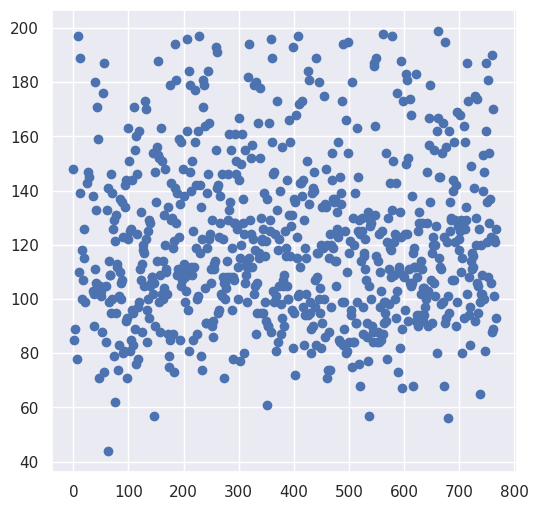

In [319]:
plt.scatter(df_clean.index,df_clean['Glucose'])
plt.show()

<Axes: xlabel='None', ylabel='Glucose'>

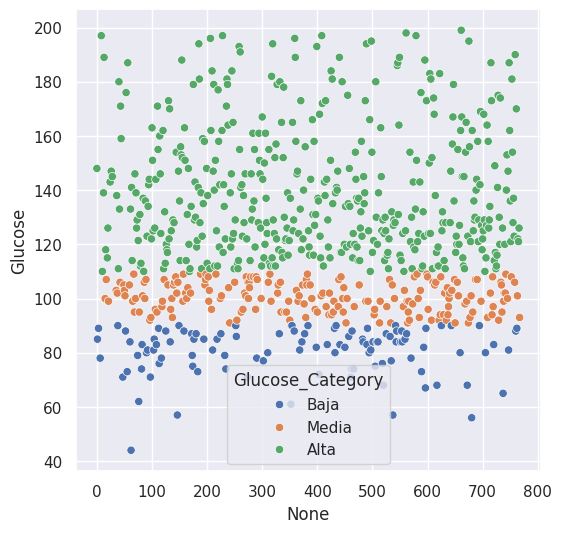

In [320]:
sns.scatterplot(x=df_clean.index,y=df_clean['Glucose'],hue=df_clean['Glucose_Category'])

###### LINE PLOT WITH MARKERS

###### Setting title, figure size, labels and font size in matplotlib

<ipython-input-321-6e5b86e9037c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df_clean.groupby('Glucose_Category'):


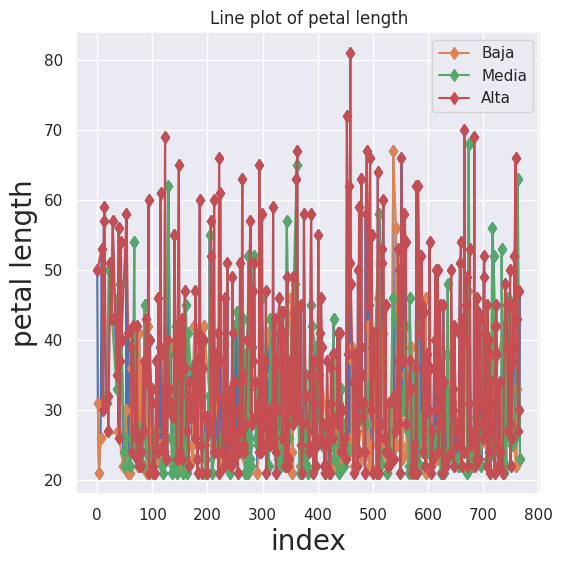

In [321]:
plt.figure(figsize=(6,6))
plt.title('Line plot of petal length')
plt.xlabel('index',fontsize=20)
plt.ylabel('petal length',fontsize=20)
plt.plot(df_clean.index,df_clean['Age'],markevery=1,marker='d')
for name, group in df_clean.groupby('Glucose_Category'):
    plt.plot(group.index, group['Age'], label=name,markevery=1,marker='d')
plt.legend()
plt.show()

###### Setting title, figure size,labels and font size in seaborn

In [322]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.5)

[Text(0.5, 0, 'index')]

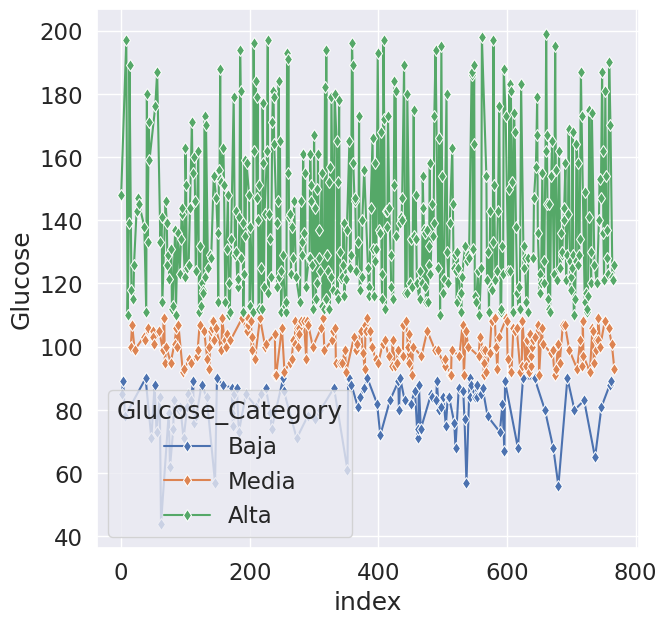

In [326]:
fig=sns.lineplot(x=df_clean.index,y=df_clean['Glucose'],markevery=1,marker='d',data=df_clean,hue=df_clean['Glucose_Category'])
fig.set(xlabel='index')

###### STRIP PLOT

<Axes: xlabel='Glucose_Category', ylabel='Glucose'>

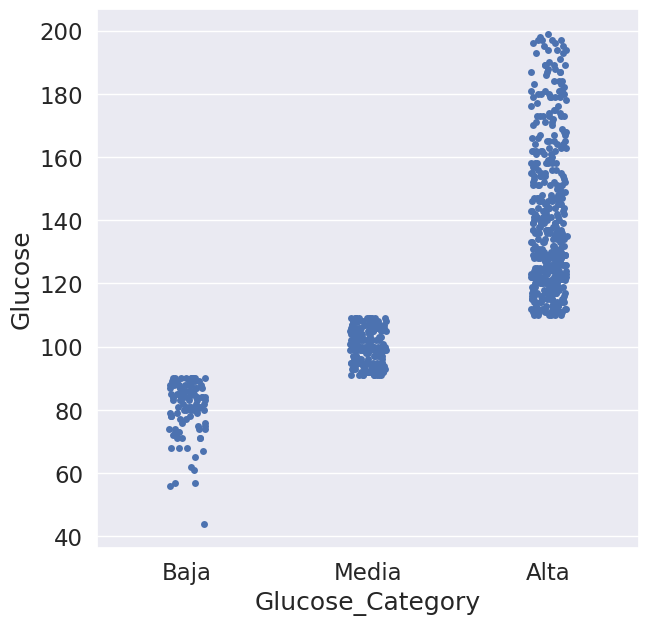

In [327]:
sns.stripplot(y=df_clean['Glucose'], x=df_clean['Glucose_Category'])

<Axes: xlabel='BMI', ylabel='Glucose_Category'>

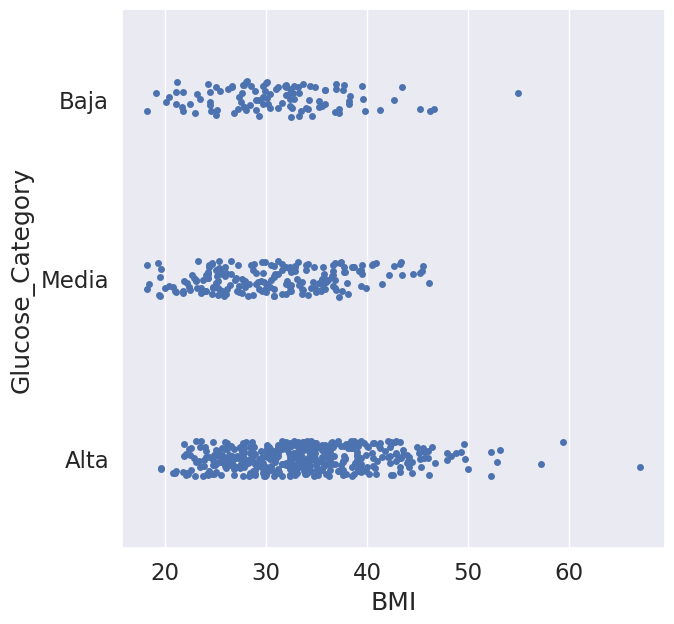

In [328]:
# Strip-plot(category wise)
sns.stripplot(x=df_clean['BMI'],y=df_clean['Glucose_Category'])

###### SWARM PLOT

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='BMI', ylabel='Glucose_Category'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


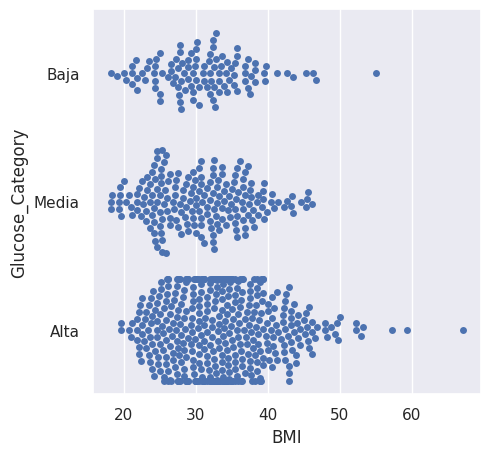

In [329]:
#Setting figure size
sns.set(rc={'figure.figsize':(5,5)})
#Swarm-plot
sns.swarmplot(x=df_clean['BMI'], y=df_clean['Glucose_Category'])

### SUMMARY PLOTS

###### HISTOGRAM

(array([  4.,  19.,  87., 148., 165., 123.,  87.,  53.,  42.,  31.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

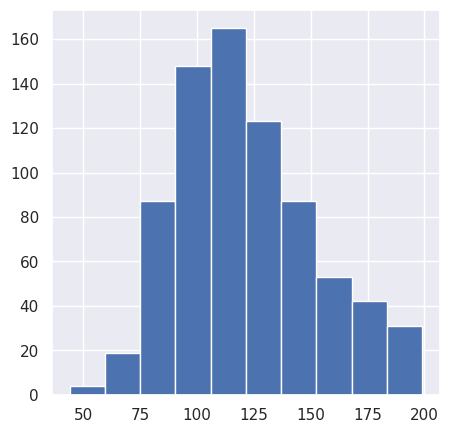

In [331]:
plt.hist(df['Glucose'])

<ipython-input-314-2ef3abd8e6b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'],kde=False,color='black',bins=10)


<Axes: xlabel='Glucose'>

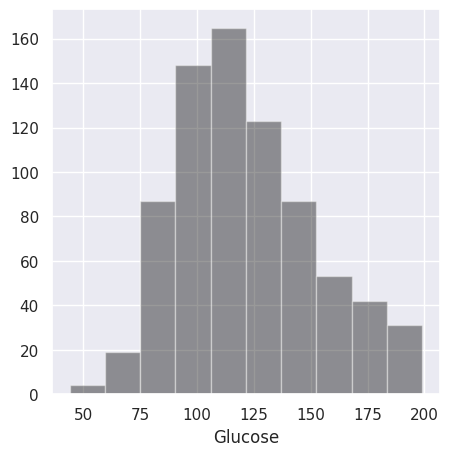

In [314]:
sns.distplot(df['Glucose'],kde=False,color='black',bins=10)

###### DENSITY PLOT

<Axes: ylabel='Density'>

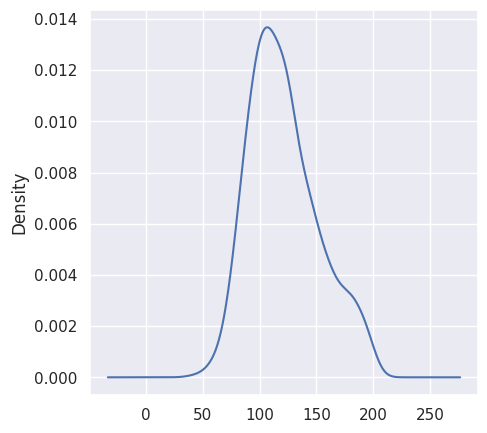

In [315]:
plt.figure(figsize=(5,5))
df['Glucose'].plot(kind='density')

<ipython-input-316-8a16aed5a5f2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Glucose'],shade=True)


<Axes: xlabel='Glucose', ylabel='Density'>

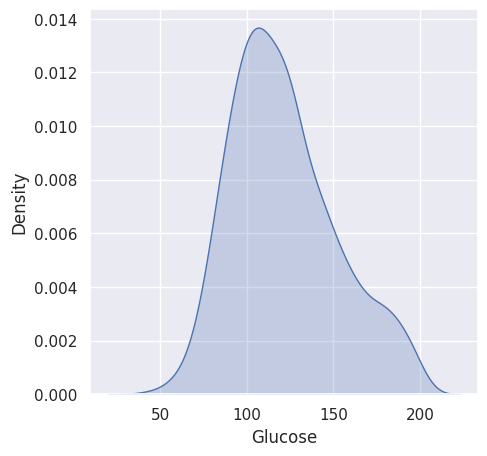

In [316]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Glucose'],shade=True)

###### RUG PLOT

<ipython-input-317-e6500adcca54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'],rug=True,hist=False)


<Axes: xlabel='Glucose', ylabel='Density'>

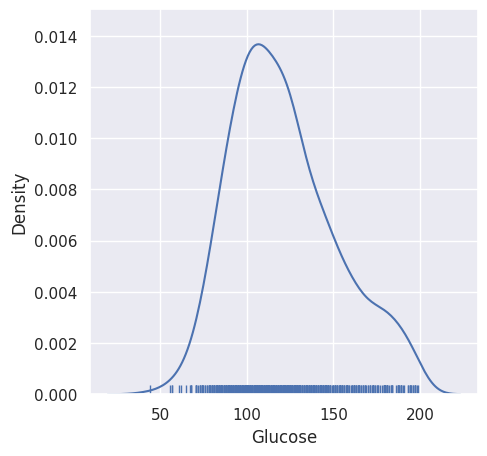

In [317]:
sns.distplot(df['Glucose'],rug=True,hist=False)

###### BOX PLOT

<ipython-input-318-8c9c9fce7d34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Glucose'],color='black',rug=True)


<Axes: xlabel='Glucose', ylabel='Density'>

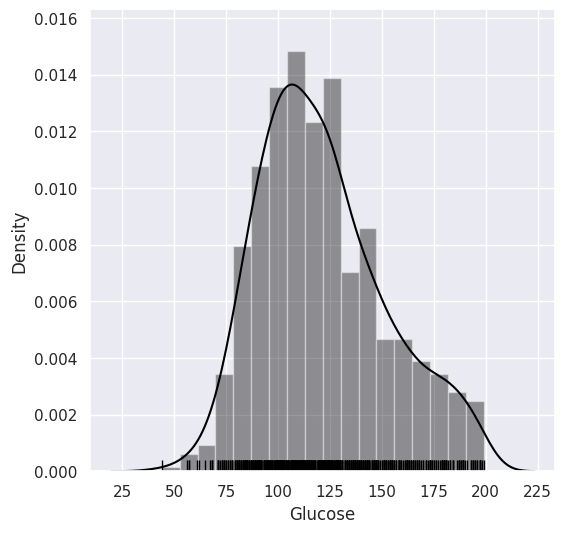

In [318]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df_clean['Glucose'],color='black',rug=True)

## Plots for categorical variables' analysis

###### BAR PLOT

<Axes: xlabel='Glucose_Category'>

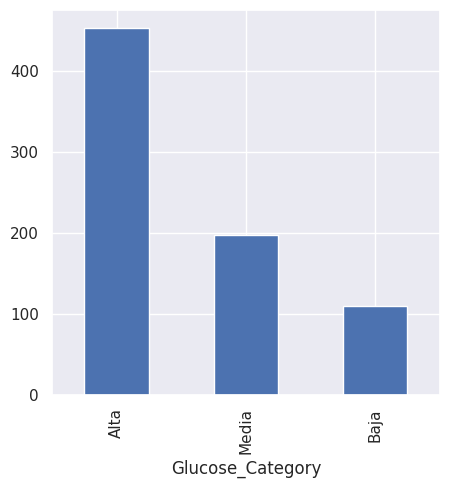

In [332]:
df['Glucose_Category'].value_counts().plot.bar()

###### PIE CHART

([<matplotlib.patches.Wedge at 0x7d2b4d226050>,
 [Text(-0.32042427009903107, 1.052296672584069, ''),
  Text(-0.1803304473680541, -1.0851179335685304, ''),
  Text(0.9855306945829155, -0.4885992734694928, '')])

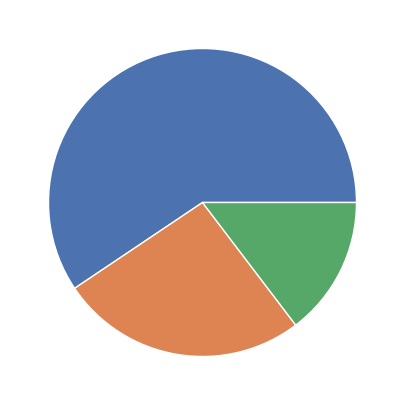

In [333]:
plt.pie(df_clean['Glucose_Category'].value_counts(),shadow=False)

In [48]:
df1=df_clean.sample(frac=0.35)

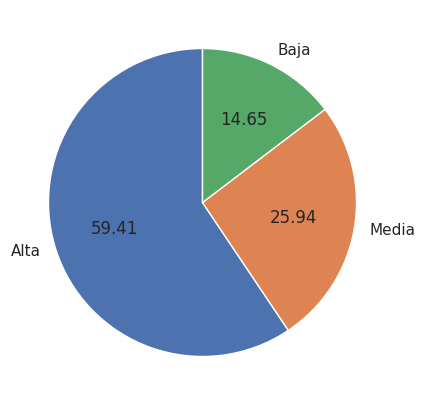

In [334]:
plt.figure(figsize=(5,5))
plt.pie(df_clean['Glucose_Category'].value_counts(), labels=df_clean['Glucose_Category'].value_counts().index, startangle=90,autopct='%.2f',shadow=False)
plt.show()

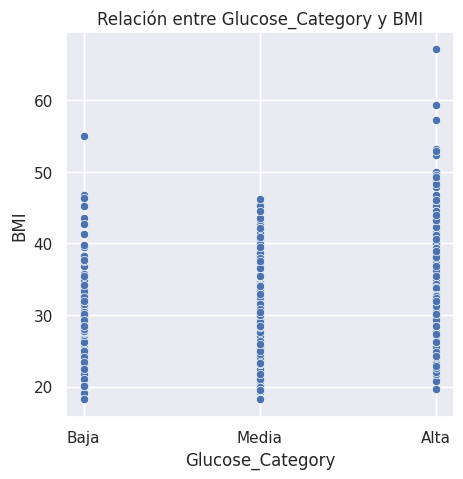

In [338]:
# Gráfico de dispersión para visualizar la relación entre 'Glucose_Category' y 'Age'
sns.scatterplot(x='Glucose_Category', y='BMI', data=df_clean)
plt.title('Relación entre Glucose_Category y BMI')
plt.xlabel('Glucose_Category')
plt.ylabel('BMI')
plt.show()